# 1. Same Parameters

## Imports and Setup

In [464]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

## Load Mean and Standard Deviation Values

In [465]:
# Load mean and std values from JSON
with open('mean_std.json', 'r') as f:
    mean_std = json.load(f)
mean = np.array(mean_std['mean'])
std = np.array(mean_std['std'])

## Model Definition

In [466]:
def get_mobilenetv2_model(num_classes):
    base_model = MobileNetV2(weights=None, include_top=False, input_shape=(224, 224, 3))

    # Freeze all the weights
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Define the model
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

## Data Generators

In [467]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    horizontal_flip=True
)
train_datagen.mean = mean
train_datagen.std = std

val_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True
)
val_datagen.mean = mean
val_datagen.std = std

## Training and Evaluation Function

In [468]:
def train_model(model, train_generator, val_generator, num_epochs=10, patience=3):
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=patience, restore_best_weights=True)

    history = model.fit(
        train_generator,
        epochs=num_epochs,
        validation_data=val_generator,
        callbacks=[early_stopping]
    )

    return model, history

def evaluate_model(model, generator):
    results = model.evaluate(generator)
    return results

## Main Training and Evaluation Loop

Starting training for fold 0...
Found 384 images belonging to 4 classes.


Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 5s 163ms/step - loss: 1.3864 - accuracy: 0.2161 - val_loss: 1.3866 - val_accuracy: 0.1875
Epoch 2/10
24/24 [==============================] - 4s 164ms/step - loss: 1.3862 - accuracy: 0.2656 - val_loss: 1.3870 - val_accuracy: 0.1875
Epoch 3/10
24/24 [==============================] - 3s 126ms/step - loss: 1.3861 - accuracy: 0.2656 - val_loss: 1.3875 - val_accuracy: 0.1875
Epoch 4/10
24/24 [==============================] - 3s 123ms/step - loss: 1.3861 - accuracy: 0.2656 - val_loss: 1.3877 - val_accuracy: 0.1875
Evaluating model for fold 0...
6/6 [==============================] - 1s 86ms/step - loss: 1.3866 - accuracy: 0.1875
Val loss: 1.3866, Val accuracy: 18.7500
Training and evaluation for fold 0 completed.

Starting training for fold 1...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 5s 161ms/step - loss: 1.3864 - accuracy: 0.1927 - val_loss: 1.3869 - val_accuracy: 0.1562
Epoch 2/10
24/24 [==============================] - 3s 124ms/step - loss: 1.3862 - accuracy: 0.2734 - val_loss: 1.3875 - val_accuracy: 0.1562
Epoch 3/10
24/24 [==============================] - 3s 119ms/step - loss: 1.3862 - accuracy: 0.2734 - val_loss: 1.3884 - val_accuracy: 0.1562
Epoch 4/10
24/24 [==============================] - 3s 118ms/step - loss: 1.3859 - accuracy: 0.2734 - val_loss: 1.3890 - val_accuracy: 0.1562
Evaluating model for fold 1...
6/6 [==============================] - 1s 86ms/step - loss: 1.3869 - accuracy: 0.1562
Val loss: 1.3869, Val accuracy: 15.6250
Training and evaluation for fold 1 completed.

Starting training for fold 2...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 5s 176ms/step - loss: 1.3863 - accuracy: 0.2552 - val_loss: 1.3867 - val_accuracy: 0.1667
Epoch 2/10
24/24 [==============================] - 3s 117ms/step - loss: 1.3862 - accuracy: 0.2708 - val_loss: 1.3873 - val_accuracy: 0.1667
Epoch 3/10
24/24 [==============================] - 3s 122ms/step - loss: 1.3860 - accuracy: 0.2708 - val_loss: 1.3878 - val_accuracy: 0.1667
Epoch 4/10
24/24 [==============================] - 3s 118ms/step - loss: 1.3860 - accuracy: 0.2708 - val_loss: 1.3885 - val_accuracy: 0.1667
Evaluating model for fold 2...
6/6 [==============================] - 1s 92ms/step - loss: 1.3867 - accuracy: 0.1667
Val loss: 1.3867, Val accuracy: 16.6667
Training and evaluation for fold 2 completed.

Starting training for fold 3...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 5s 176ms/step - loss: 1.3865 - accuracy: 0.2344 - val_loss: 1.3865 - val_accuracy: 0.2292
Epoch 2/10
24/24 [==============================] - 4s 154ms/step - loss: 1.3864 - accuracy: 0.2552 - val_loss: 1.3865 - val_accuracy: 0.2292
Epoch 3/10
24/24 [==============================] - 4s 153ms/step - loss: 1.3863 - accuracy: 0.2266 - val_loss: 1.3867 - val_accuracy: 0.2292
Epoch 4/10
24/24 [==============================] - 3s 121ms/step - loss: 1.3863 - accuracy: 0.2552 - val_loss: 1.3870 - val_accuracy: 0.2292
Evaluating model for fold 3...
6/6 [==============================] - 1s 95ms/step - loss: 1.3865 - accuracy: 0.2292
Val loss: 1.3865, Val accuracy: 22.9167
Training and evaluation for fold 3 completed.

Starting training for fold 4...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 4s 138ms/step - loss: 1.3865 - accuracy: 0.2422 - val_loss: 1.3867 - val_accuracy: 0.2188
Epoch 2/10
24/24 [==============================] - 3s 114ms/step - loss: 1.3863 - accuracy: 0.2448 - val_loss: 1.3869 - val_accuracy: 0.2188
Epoch 3/10
24/24 [==============================] - 3s 126ms/step - loss: 1.3862 - accuracy: 0.2578 - val_loss: 1.3872 - val_accuracy: 0.2188
Epoch 4/10
24/24 [==============================] - 3s 118ms/step - loss: 1.3861 - accuracy: 0.2578 - val_loss: 1.3874 - val_accuracy: 0.2188
Evaluating model for fold 4...
6/6 [==============================] - 1s 86ms/step - loss: 1.3867 - accuracy: 0.2188
Val loss: 1.3867, Val accuracy: 21.8750
Training and evaluation for fold 4 completed.

Loading model for fold 0...
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 86ms/step
Fold 0 - ROC-AUC for class glioma: 0.9938
Fold 0 - ROC-AUC for class meningioma: 0.9501
Fold 0 - ROC-AUC for

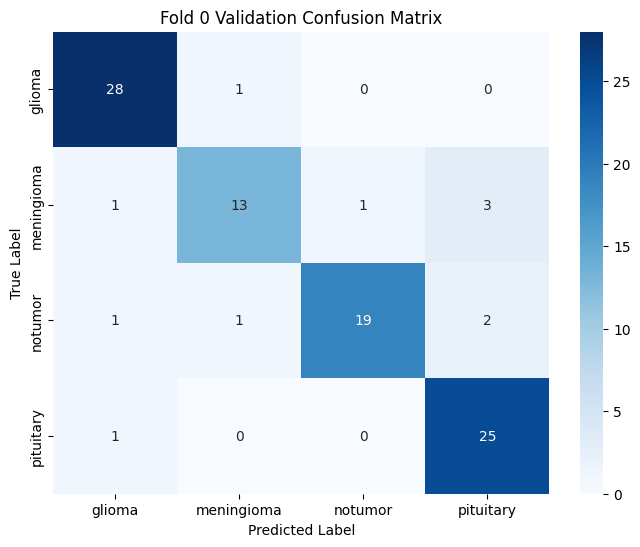

Classification Report for Fold 0:
              precision    recall  f1-score   support

      glioma       0.90      0.97      0.93        29
  meningioma       0.87      0.72      0.79        18
     notumor       0.95      0.83      0.88        23
   pituitary       0.83      0.96      0.89        26

    accuracy                           0.89        96
   macro avg       0.89      0.87      0.87        96
weighted avg       0.89      0.89      0.88        96

Class-wise TP, TN, FP, FN for Fold 0:
Class: glioma, TP: 28, TN: 64, FP: 3, FN: 1
Class: meningioma, TP: 13, TN: 76, FP: 2, FN: 5
Class: notumor, TP: 19, TN: 72, FP: 1, FN: 4
Class: pituitary, TP: 25, TN: 65, FP: 5, FN: 1
Loading model for fold 1...
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 85ms/step
Fold 1 - ROC-AUC for class glioma: 0.9571
Fold 1 - ROC-AUC for class meningioma: 0.8625
Fold 1 - ROC-AUC for class notumor: 0.9737
Fold 1 - ROC-AUC for class pituitary: 0.9440


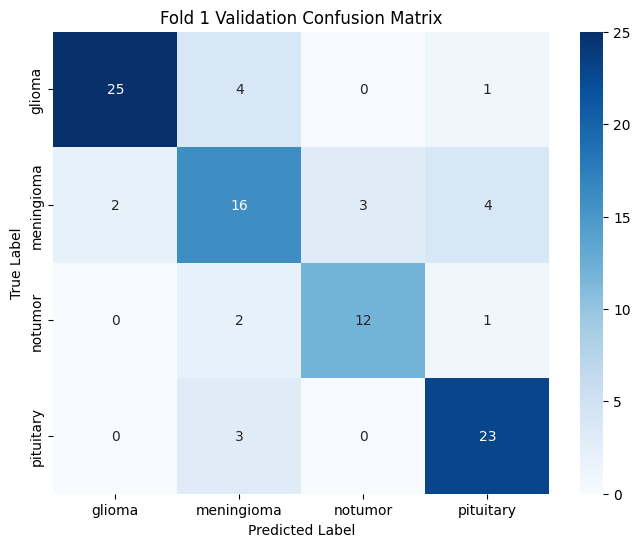

Classification Report for Fold 1:
              precision    recall  f1-score   support

      glioma       0.93      0.83      0.88        30
  meningioma       0.64      0.64      0.64        25
     notumor       0.80      0.80      0.80        15
   pituitary       0.79      0.88      0.84        26

    accuracy                           0.79        96
   macro avg       0.79      0.79      0.79        96
weighted avg       0.80      0.79      0.79        96

Class-wise TP, TN, FP, FN for Fold 1:
Class: glioma, TP: 25, TN: 64, FP: 2, FN: 5
Class: meningioma, TP: 16, TN: 62, FP: 9, FN: 9
Class: notumor, TP: 12, TN: 78, FP: 3, FN: 3
Class: pituitary, TP: 23, TN: 64, FP: 6, FN: 3
Loading model for fold 2...
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 192ms/step
Fold 2 - ROC-AUC for class glioma: 0.9883
Fold 2 - ROC-AUC for class meningioma: 0.9308
Fold 2 - ROC-AUC for class notumor: 0.9848
Fold 2 - ROC-AUC for class pituitary: 0.9745


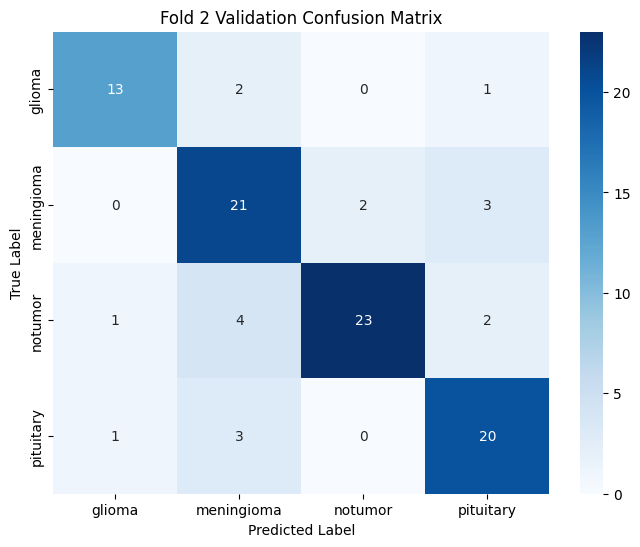

Classification Report for Fold 2:
              precision    recall  f1-score   support

      glioma       0.87      0.81      0.84        16
  meningioma       0.70      0.81      0.75        26
     notumor       0.92      0.77      0.84        30
   pituitary       0.77      0.83      0.80        24

    accuracy                           0.80        96
   macro avg       0.81      0.81      0.81        96
weighted avg       0.81      0.80      0.80        96

Class-wise TP, TN, FP, FN for Fold 2:
Class: glioma, TP: 13, TN: 78, FP: 2, FN: 3
Class: meningioma, TP: 21, TN: 61, FP: 9, FN: 5
Class: notumor, TP: 23, TN: 64, FP: 2, FN: 7
Class: pituitary, TP: 20, TN: 66, FP: 6, FN: 4
Loading model for fold 3...
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 92ms/step
Fold 3 - ROC-AUC for class glioma: 0.9714
Fold 3 - ROC-AUC for class meningioma: 0.9275
Fold 3 - ROC-AUC for class notumor: 0.9681
Fold 3 - ROC-AUC for class pituitary: 0.9929


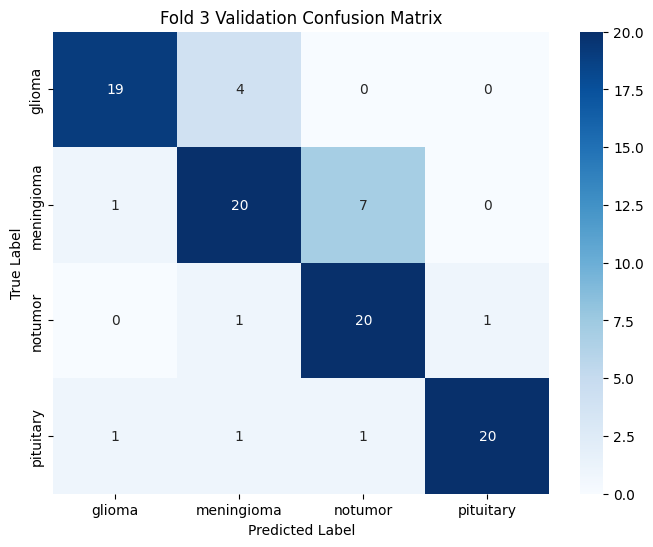

Classification Report for Fold 3:
              precision    recall  f1-score   support

      glioma       0.90      0.83      0.86        23
  meningioma       0.77      0.71      0.74        28
     notumor       0.71      0.91      0.80        22
   pituitary       0.95      0.87      0.91        23

    accuracy                           0.82        96
   macro avg       0.84      0.83      0.83        96
weighted avg       0.83      0.82      0.82        96

Class-wise TP, TN, FP, FN for Fold 3:
Class: glioma, TP: 19, TN: 71, FP: 2, FN: 4
Class: meningioma, TP: 20, TN: 62, FP: 6, FN: 8
Class: notumor, TP: 20, TN: 66, FP: 8, FN: 2
Class: pituitary, TP: 20, TN: 72, FP: 1, FN: 3
Loading model for fold 4...
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 92ms/step
Fold 4 - ROC-AUC for class glioma: 0.9748
Fold 4 - ROC-AUC for class meningioma: 0.9095
Fold 4 - ROC-AUC for class notumor: 0.9692
Fold 4 - ROC-AUC for class pituitary: 0.9975


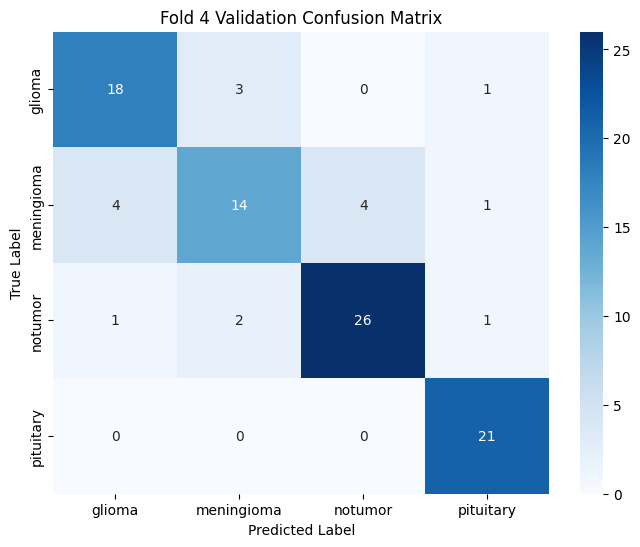

Classification Report for Fold 4:
              precision    recall  f1-score   support

      glioma       0.78      0.82      0.80        22
  meningioma       0.74      0.61      0.67        23
     notumor       0.87      0.87      0.87        30
   pituitary       0.88      1.00      0.93        21

    accuracy                           0.82        96
   macro avg       0.82      0.82      0.82        96
weighted avg       0.82      0.82      0.82        96

Class-wise TP, TN, FP, FN for Fold 4:
Class: glioma, TP: 18, TN: 69, FP: 5, FN: 4
Class: meningioma, TP: 14, TN: 68, FP: 5, FN: 9
Class: notumor, TP: 26, TN: 62, FP: 4, FN: 4
Class: pituitary, TP: 21, TN: 72, FP: 3, FN: 0


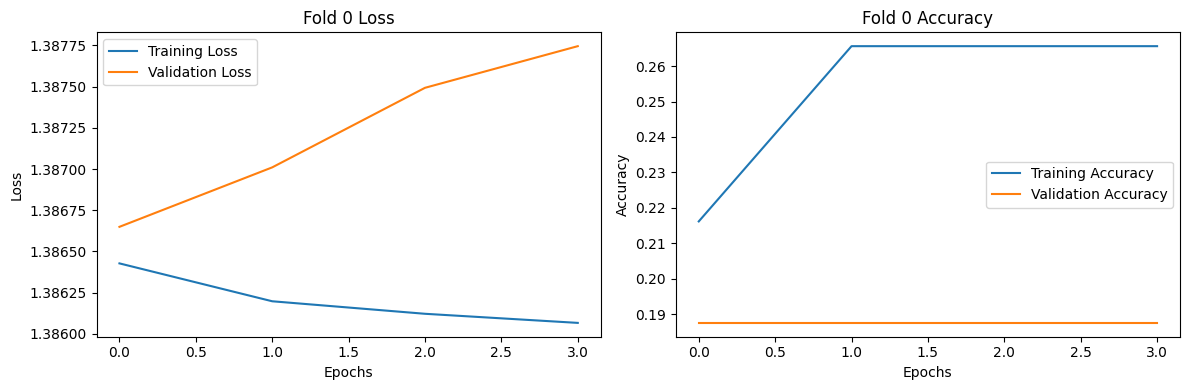

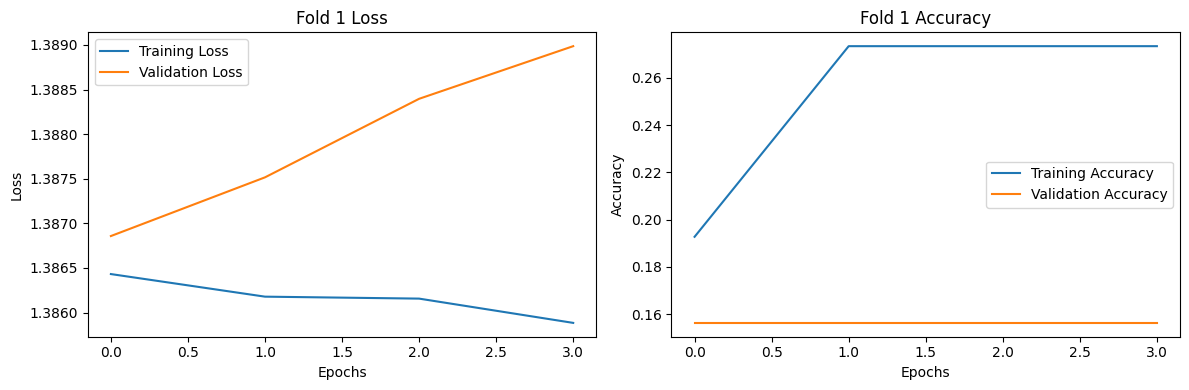

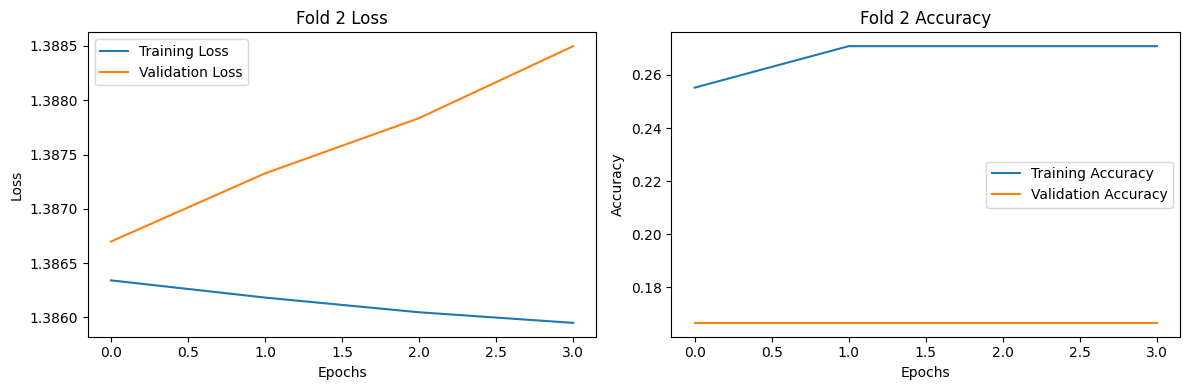

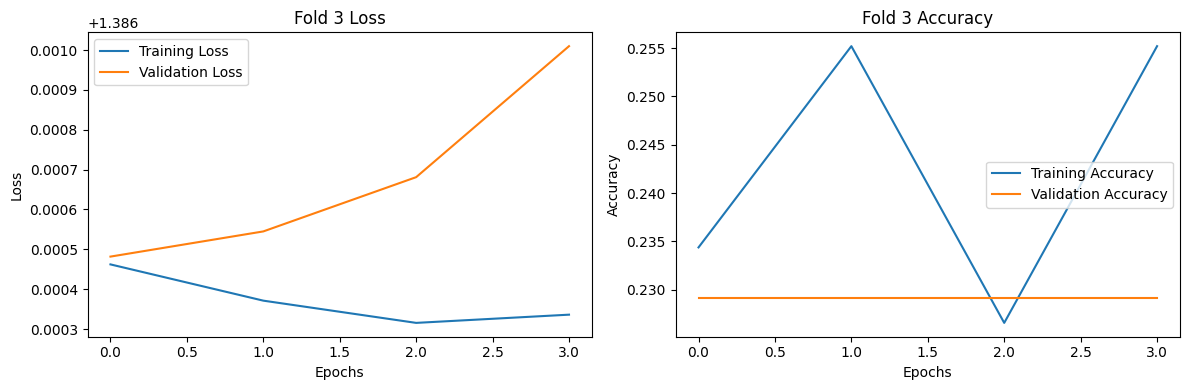

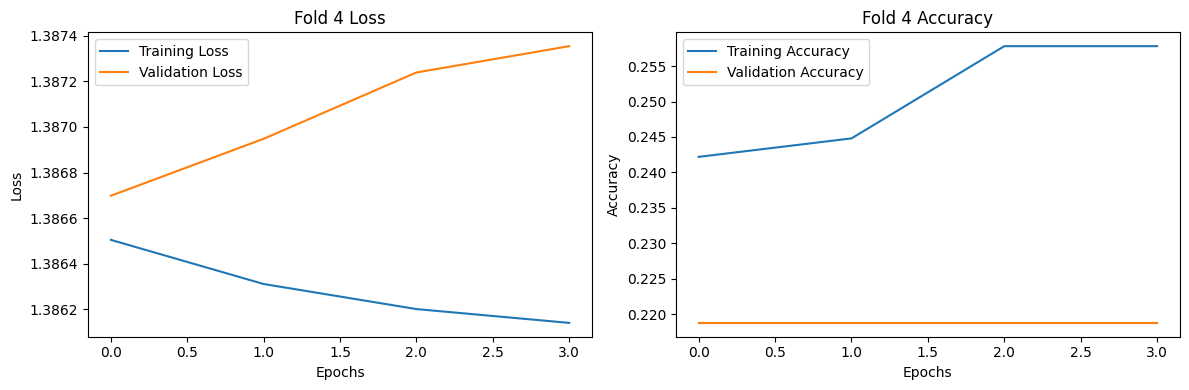

Accuracies for each fold:
Fold 0: 18.75%
Fold 1: 15.62%
Fold 2: 16.67%
Fold 3: 22.92%
Fold 4: 21.88%


In [469]:
# Base directory containing the k-fold datasets
base_dir = 'dataset_kfold'

all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []
fold_accuracies = []

# Loop through each fold directory
for fold in range(5):
    print(f'Starting training for fold {fold}...')

    fold_dir = os.path.join(base_dir, f'fold_{fold}')
    train_dir = os.path.join(fold_dir, 'train')
    val_dir = os.path.join(fold_dir, 'val')

    # Load the datasets
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),  # Image size specified here
        batch_size=16,
        class_mode='categorical'
    )
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),  # Image size specified here
        batch_size=16,
        class_mode='categorical'
    )

    # Get the model and compile it
    num_classes = len(train_generator.class_indices)
    model = get_mobilenetv2_model(num_classes)
    model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train and evaluate the model
    model, history = train_model(model, train_generator, val_generator, num_epochs=10, patience=3)

    # Save the model for this fold
    #model_path = f'mobilenetv2_fold_{fold}.h5'
    #model.save(model_path)
    #print(f'Model for fold {fold} saved at {model_path}')

    # Collecting results for plotting
    all_train_losses.append(history.history['loss'])
    all_val_losses.append(history.history['val_loss'])
    all_train_accuracies.append(history.history['accuracy'])
    all_val_accuracies.append(history.history['val_accuracy'])

    print(f'Evaluating model for fold {fold}...')
    val_loss, val_acc = evaluate_model(model, val_generator)
    fold_accuracies.append(val_acc)
    print(f'Val loss: {val_loss:.4f}, Val accuracy: {val_acc * 100:.4f}')
    print(f'Training and evaluation for fold {fold} completed.\n')

# Confusion Matrix, AUC-ROC, and Classification Report for each fold
for fold in range(5):
    print(f'Loading model for fold {fold}...')
    model_path = f'mobilenetv2_fold_{fold}.h5'
    model = tf.keras.models.load_model(model_path)

    # Load the validation dataset for the current fold
    val_dir = os.path.join(base_dir, f'fold_{fold}', 'val')
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),  # Image size specified here
        batch_size=16,
        class_mode='categorical',
        shuffle=False
    )

    # Make predictions on the validation data
    val_predictions = model.predict(val_generator)
    val_predictions_classes = np.argmax(val_predictions, axis=1)
    val_true_classes = val_generator.classes

    # Compute the confusion matrix for this fold
    val_conf_matrix = confusion_matrix(val_true_classes, val_predictions_classes)

    # Compute the AUC-ROC for each class
    val_true_classes_one_hot = tf.keras.utils.to_categorical(val_true_classes, num_classes)
    auc_roc_scores = {}
    for i, class_name in enumerate(val_generator.class_indices.keys()):
        fpr, tpr, _ = roc_curve(val_true_classes_one_hot[:, i], val_predictions[:, i])
        roc_auc = auc(fpr, tpr)
        auc_roc_scores[class_name] = roc_auc
        print(f'Fold {fold} - ROC-AUC for class {class_name}: {roc_auc:.4f}')

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Fold {fold} Validation Confusion Matrix')
    plt.show()

    # Print classification report for this fold
    print(f'Classification Report for Fold {fold}:')
    print(classification_report(val_true_classes, val_predictions_classes, target_names=list(val_generator.class_indices.keys())))

    # Calculate TP, TN, FP, FN for each class in this fold
    class_names = list(val_generator.class_indices.keys())
    table_data = []
    for i, class_name in enumerate(class_names):
        tp = val_conf_matrix[i, i]
        fp = np.sum(val_conf_matrix[:, i]) - tp
        fn = np.sum(val_conf_matrix[i, :]) - tp
        tn = np.sum(val_conf_matrix) - tp - fp - fn
        table_data.append([class_name, tp, tn, fp, fn])

    # Print the TP, TN, FP, FN table for this fold
    print(f"Class-wise TP, TN, FP, FN for Fold {fold}:")
    for row in table_data:
        print(f"Class: {row[0]}, TP: {row[1]}, TN: {row[2]}, FP: {row[3]}, FN: {row[4]}")

# Plotting Results and Printing Fold Accuracies
def plot_results(all_train_losses, all_val_losses, all_train_accuracies, all_val_accuracies):
    for fold in range(5):
        plt.figure(figsize=(12, 4))

        # Plot losses
        plt.subplot(1, 2, 1)
        plt.plot(all_train_losses[fold], label='Training Loss')
        plt.plot(all_val_losses[fold], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Fold {fold} Loss')
        plt.legend()

        # Plot accuracies
        plt.subplot(1, 2, 2)
        plt.plot(all_train_accuracies[fold], label='Training Accuracy')
        plt.plot(all_val_accuracies[fold], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Fold {fold} Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Plot the results
plot_results(all_train_losses, all_val_losses, all_train_accuracies, all_val_accuracies)

# Print the accuracies for each fold
print("Accuracies for each fold:")
for fold, accuracy in enumerate(fold_accuracies):
    print(f"Fold {fold}: {accuracy * 100:.2f}%")

# 2. Own Parameters

## Imports and Setup

In [482]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

## Load Mean and Standard Deviation Values

In [483]:
# Load mean and std values from JSON
with open('mean_std.json', 'r') as f:
    mean_std = json.load(f)
mean = np.array(mean_std['mean'])
std = np.array(mean_std['std'])

## Model Definition

In [484]:
def get_mobilenetv2_model(num_classes):
    base_model = MobileNetV2(weights=None, include_top=False, input_shape=(224, 224, 3))

    # Unfreeze the last few layers for fine-tuning
    for layer in base_model.layers[-20:]:
        layer.trainable = True

    # Add custom classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Define the model
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

## Data Generators

In [485]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2
)
train_datagen.mean = mean
train_datagen.std = std

val_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True
)
val_datagen.mean = mean
val_datagen.std = std

## Training and Evaluation Functions

In [486]:
def train_model(model, train_generator, val_generator, num_epochs=10, patience=3):
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

    history = model.fit(
        train_generator,
        epochs=num_epochs,
        validation_data=val_generator,
        callbacks=[early_stopping, reduce_lr]
    )
    return model, history

def evaluate_model(model, generator):
    results = model.evaluate(generator)
    return results

## Main Training and Evaluation Loop

Starting training for fold 0...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 16s 544ms/step - loss: 2.0994 - accuracy: 0.3490 - val_loss: 1.3881 - val_accuracy: 0.3021 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 13s 529ms/step - loss: 1.9970 - accuracy: 0.3724 - val_loss: 1.3986 - val_accuracy: 0.3021 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 15s 613ms/step - loss: 1.9150 - accuracy: 0.4089 - val_loss: 1.4217 - val_accuracy: 0.3021 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 15s 607ms/step - loss: 1.8049 - accuracy: 0.4010 - val_loss: 1.4534 - val_accuracy: 0.3021 - lr: 1.0000e-04
Evaluating model for fold 0...
6/6 [==============================] - 1s 97ms/step - loss: 1.3881 - accuracy: 0.3021
Val loss: 1.3881, Val accuracy: 30.2083
Training and evaluation for fold 0 completed.

Starting training for fold 1...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 17s 572ms/step - loss: 2.0939 - accuracy: 0.3385 - val_loss: 1.3810 - val_accuracy: 0.3125 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 17s 721ms/step - loss: 1.7534 - accuracy: 0.4115 - val_loss: 1.4076 - val_accuracy: 0.2708 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 28s 1s/step - loss: 1.9402 - accuracy: 0.4115 - val_loss: 1.4142 - val_accuracy: 0.2708 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 34s 1s/step - loss: 1.6762 - accuracy: 0.4688 - val_loss: 1.4526 - val_accuracy: 0.3125 - lr: 1.0000e-04
Evaluating model for fold 1...
6/6 [==============================] - 1s 182ms/step - loss: 1.3810 - accuracy: 0.3125
Val loss: 1.3810, Val accuracy: 31.2500
Training and evaluation for fold 1 completed.

Starting training for fold 2...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 47s 2s/step - loss: 2.0700 - accuracy: 0.3307 - val_loss: 1.4540 - val_accuracy: 0.1667 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 24s 969ms/step - loss: 1.7189 - accuracy: 0.4349 - val_loss: 1.5018 - val_accuracy: 0.1667 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 17s 691ms/step - loss: 2.0373 - accuracy: 0.4036 - val_loss: 1.5527 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 17s 690ms/step - loss: 1.8850 - accuracy: 0.4089 - val_loss: 1.6569 - val_accuracy: 0.1667 - lr: 1.0000e-04
Evaluating model for fold 2...
6/6 [==============================] - 1s 125ms/step - loss: 1.4540 - accuracy: 0.1667
Val loss: 1.4540, Val accuracy: 16.6667
Training and evaluation for fold 2 completed.

Starting training for fold 3...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 19s 635ms/step - loss: 2.0868 - accuracy: 0.3411 - val_loss: 1.3990 - val_accuracy: 0.2396 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 14s 587ms/step - loss: 2.0515 - accuracy: 0.3620 - val_loss: 1.4500 - val_accuracy: 0.2396 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 14s 589ms/step - loss: 2.0113 - accuracy: 0.4115 - val_loss: 1.5554 - val_accuracy: 0.2396 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 14s 572ms/step - loss: 1.8479 - accuracy: 0.4036 - val_loss: 1.6082 - val_accuracy: 0.2396 - lr: 1.0000e-04
Evaluating model for fold 3...
6/6 [==============================] - 1s 106ms/step - loss: 1.3990 - accuracy: 0.2396
Val loss: 1.3990, Val accuracy: 23.9583
Training and evaluation for fold 3 completed.

Starting training for fold 4...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 17s 588ms/step - loss: 2.1271 - accuracy: 0.3490 - val_loss: 1.4230 - val_accuracy: 0.2292 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 13s 555ms/step - loss: 1.8514 - accuracy: 0.3906 - val_loss: 1.4870 - val_accuracy: 0.2188 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 13s 556ms/step - loss: 1.9147 - accuracy: 0.3724 - val_loss: 1.5588 - val_accuracy: 0.2188 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 14s 594ms/step - loss: 1.9501 - accuracy: 0.3698 - val_loss: 1.6538 - val_accuracy: 0.2188 - lr: 1.0000e-04
Evaluating model for fold 4...
6/6 [==============================] - 1s 99ms/step - loss: 1.4230 - accuracy: 0.2292
Val loss: 1.4230, Val accuracy: 22.9167
Training and evaluation for fold 4 completed.

Loading model for fold 0...
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 93ms/step
Fold 0 - ROC-AUC for class glioma: 0

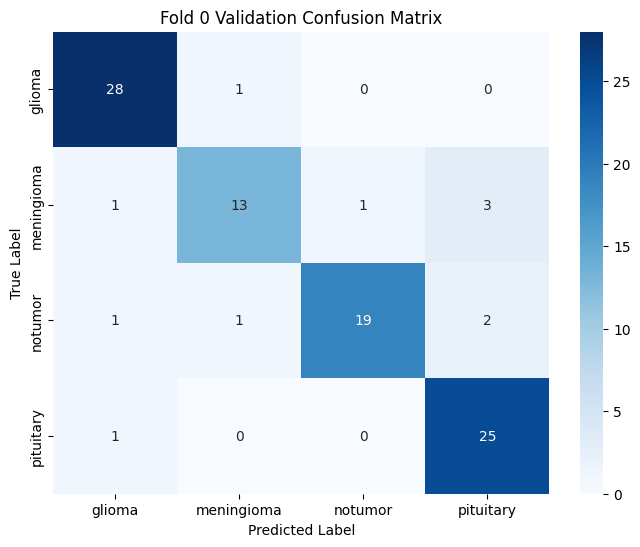

Classification Report for Fold 0:
              precision    recall  f1-score   support

      glioma       0.90      0.97      0.93        29
  meningioma       0.87      0.72      0.79        18
     notumor       0.95      0.83      0.88        23
   pituitary       0.83      0.96      0.89        26

    accuracy                           0.89        96
   macro avg       0.89      0.87      0.87        96
weighted avg       0.89      0.89      0.88        96

Class-wise TP, TN, FP, FN for Fold 0:
Class: glioma, TP: 28, TN: 64, FP: 3, FN: 1
Class: meningioma, TP: 13, TN: 76, FP: 2, FN: 5
Class: notumor, TP: 19, TN: 72, FP: 1, FN: 4
Class: pituitary, TP: 25, TN: 65, FP: 5, FN: 1
Loading model for fold 1...
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 90ms/step
Fold 1 - ROC-AUC for class glioma: 0.9571
Fold 1 - ROC-AUC for class meningioma: 0.8625
Fold 1 - ROC-AUC for class notumor: 0.9737
Fold 1 - ROC-AUC for class pituitary: 0.9440


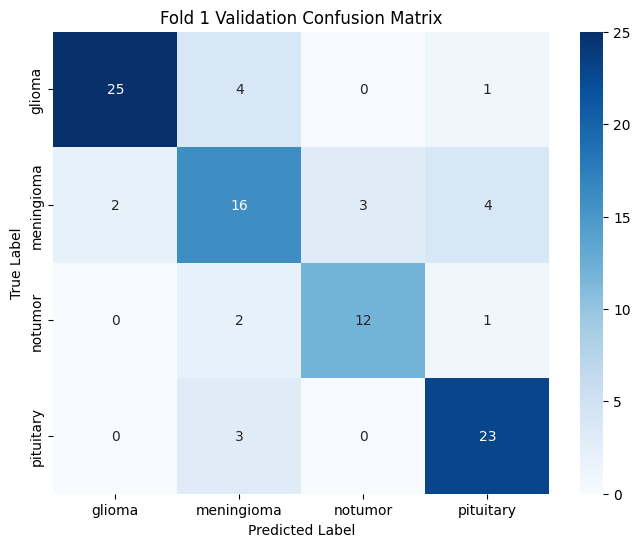

Classification Report for Fold 1:
              precision    recall  f1-score   support

      glioma       0.93      0.83      0.88        30
  meningioma       0.64      0.64      0.64        25
     notumor       0.80      0.80      0.80        15
   pituitary       0.79      0.88      0.84        26

    accuracy                           0.79        96
   macro avg       0.79      0.79      0.79        96
weighted avg       0.80      0.79      0.79        96

Class-wise TP, TN, FP, FN for Fold 1:
Class: glioma, TP: 25, TN: 64, FP: 2, FN: 5
Class: meningioma, TP: 16, TN: 62, FP: 9, FN: 9
Class: notumor, TP: 12, TN: 78, FP: 3, FN: 3
Class: pituitary, TP: 23, TN: 64, FP: 6, FN: 3
Loading model for fold 2...
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 87ms/step
Fold 2 - ROC-AUC for class glioma: 0.9883
Fold 2 - ROC-AUC for class meningioma: 0.9308
Fold 2 - ROC-AUC for class notumor: 0.9848
Fold 2 - ROC-AUC for class pituitary: 0.9745


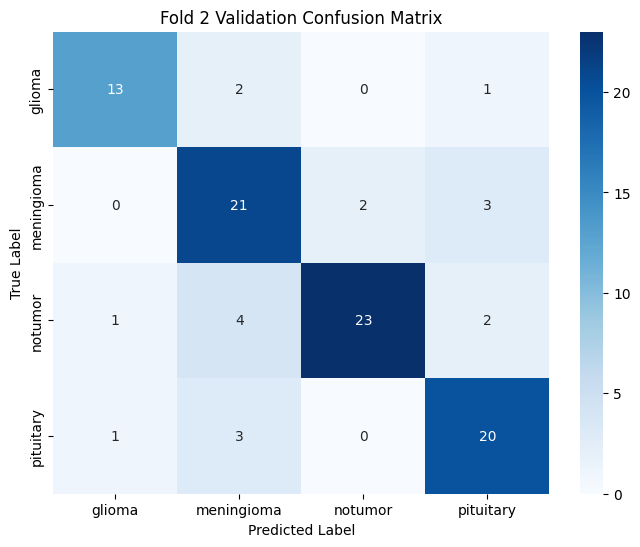

Classification Report for Fold 2:
              precision    recall  f1-score   support

      glioma       0.87      0.81      0.84        16
  meningioma       0.70      0.81      0.75        26
     notumor       0.92      0.77      0.84        30
   pituitary       0.77      0.83      0.80        24

    accuracy                           0.80        96
   macro avg       0.81      0.81      0.81        96
weighted avg       0.81      0.80      0.80        96

Class-wise TP, TN, FP, FN for Fold 2:
Class: glioma, TP: 13, TN: 78, FP: 2, FN: 3
Class: meningioma, TP: 21, TN: 61, FP: 9, FN: 5
Class: notumor, TP: 23, TN: 64, FP: 2, FN: 7
Class: pituitary, TP: 20, TN: 66, FP: 6, FN: 4
Loading model for fold 3...
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 89ms/step
Fold 3 - ROC-AUC for class glioma: 0.9714
Fold 3 - ROC-AUC for class meningioma: 0.9275
Fold 3 - ROC-AUC for class notumor: 0.9681
Fold 3 - ROC-AUC for class pituitary: 0.9929


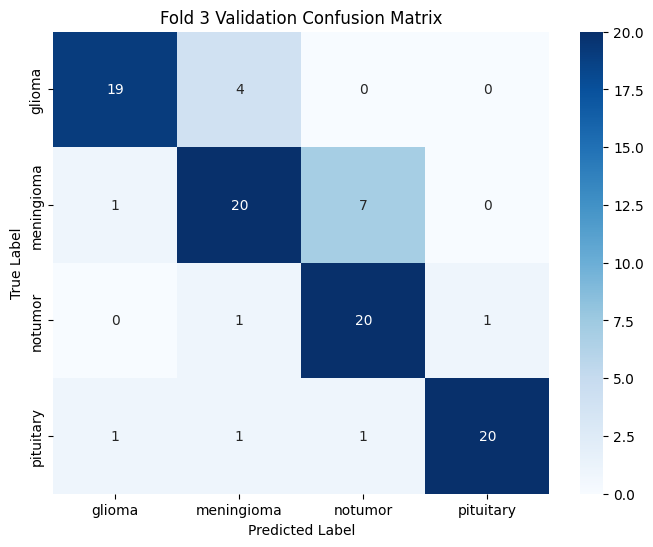

Classification Report for Fold 3:
              precision    recall  f1-score   support

      glioma       0.90      0.83      0.86        23
  meningioma       0.77      0.71      0.74        28
     notumor       0.71      0.91      0.80        22
   pituitary       0.95      0.87      0.91        23

    accuracy                           0.82        96
   macro avg       0.84      0.83      0.83        96
weighted avg       0.83      0.82      0.82        96

Class-wise TP, TN, FP, FN for Fold 3:
Class: glioma, TP: 19, TN: 71, FP: 2, FN: 4
Class: meningioma, TP: 20, TN: 62, FP: 6, FN: 8
Class: notumor, TP: 20, TN: 66, FP: 8, FN: 2
Class: pituitary, TP: 20, TN: 72, FP: 1, FN: 3
Loading model for fold 4...
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 85ms/step
Fold 4 - ROC-AUC for class glioma: 0.9748
Fold 4 - ROC-AUC for class meningioma: 0.9095
Fold 4 - ROC-AUC for class notumor: 0.9692
Fold 4 - ROC-AUC for class pituitary: 0.9975


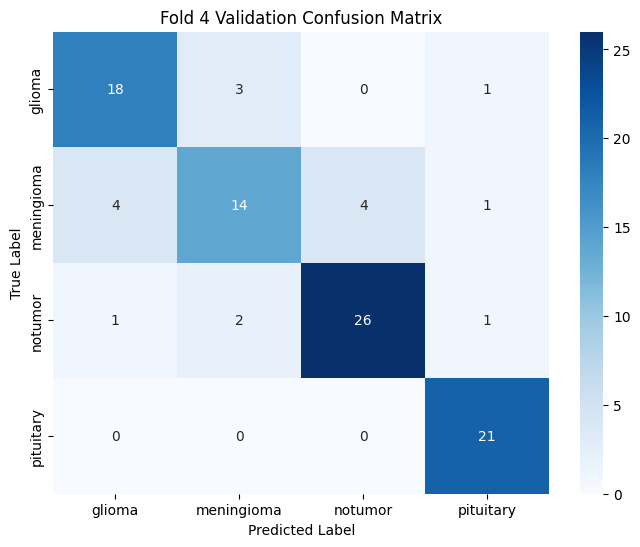

Classification Report for Fold 4:
              precision    recall  f1-score   support

      glioma       0.78      0.82      0.80        22
  meningioma       0.74      0.61      0.67        23
     notumor       0.87      0.87      0.87        30
   pituitary       0.88      1.00      0.93        21

    accuracy                           0.82        96
   macro avg       0.82      0.82      0.82        96
weighted avg       0.82      0.82      0.82        96

Class-wise TP, TN, FP, FN for Fold 4:
Class: glioma, TP: 18, TN: 69, FP: 5, FN: 4
Class: meningioma, TP: 14, TN: 68, FP: 5, FN: 9
Class: notumor, TP: 26, TN: 62, FP: 4, FN: 4
Class: pituitary, TP: 21, TN: 72, FP: 3, FN: 0


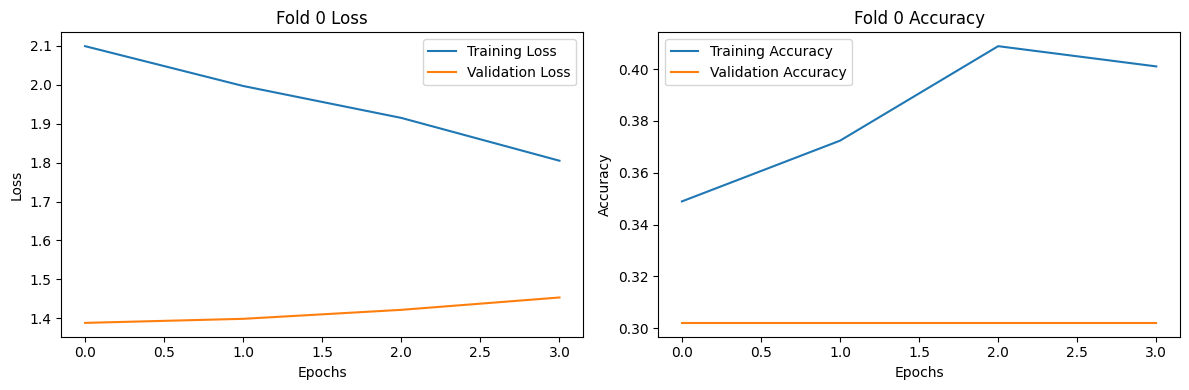

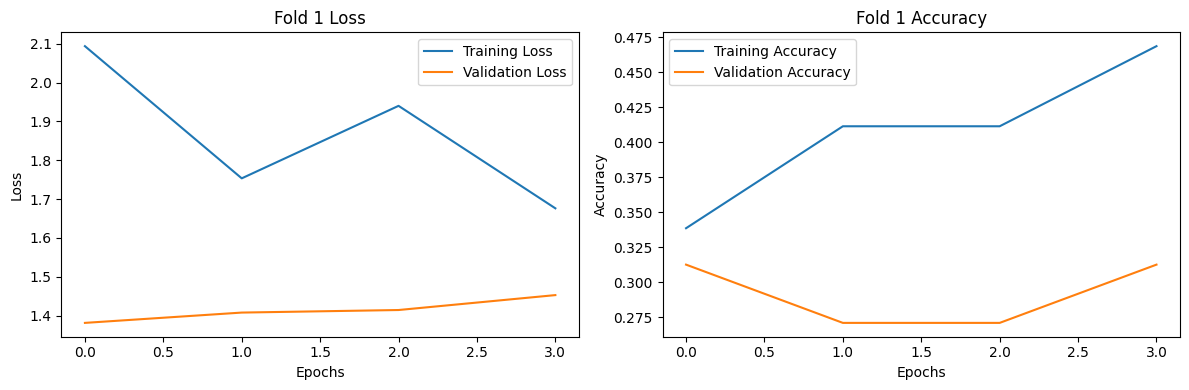

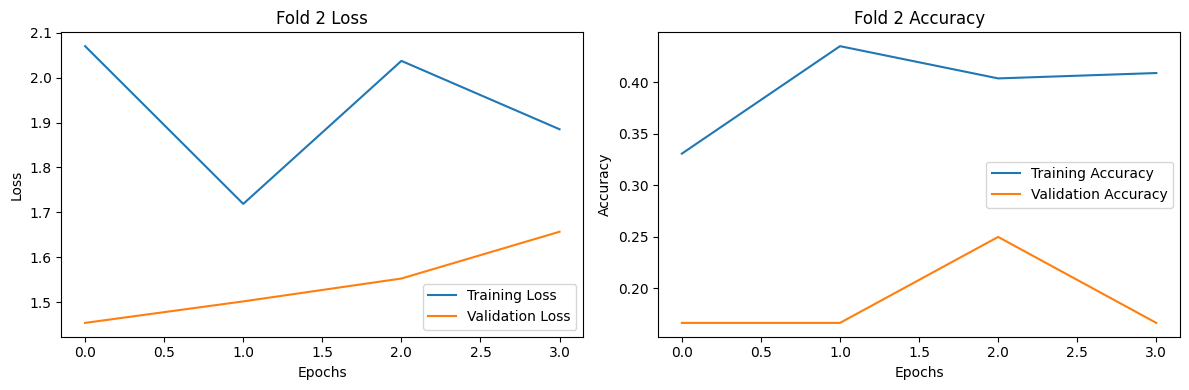

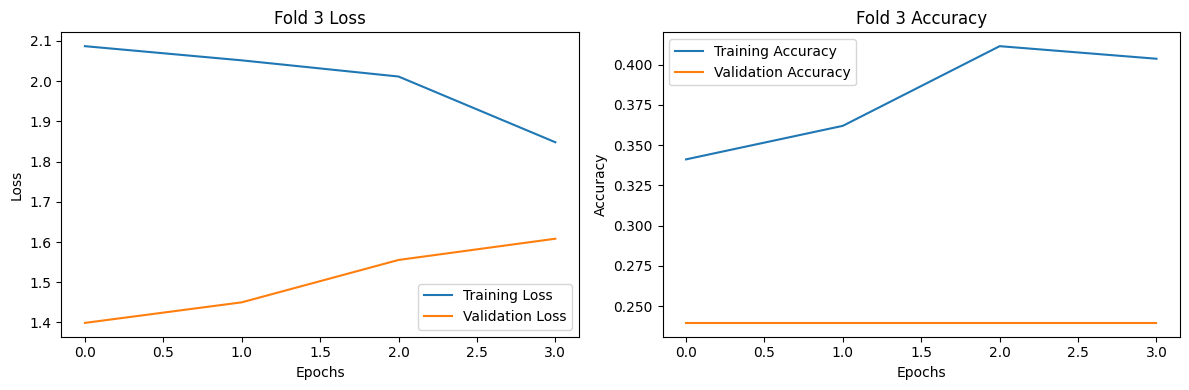

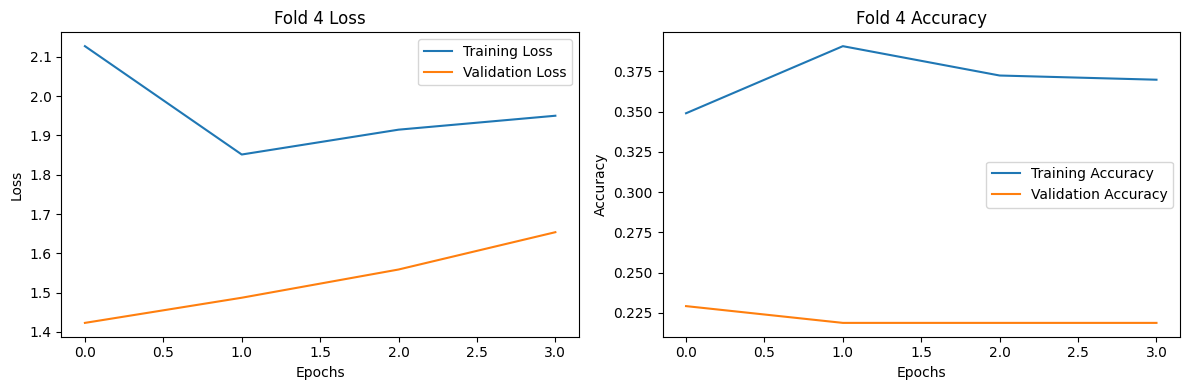

Accuracies for each fold:
Fold 0: 30.21%
Fold 1: 31.25%
Fold 2: 16.67%
Fold 3: 23.96%
Fold 4: 22.92%


In [487]:
base_dir = 'dataset_kfold'

all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []
fold_accuracies = []

for fold in range(5):
    print(f'Starting training for fold {fold}...')

    fold_dir = os.path.join(base_dir, f'fold_{fold}')
    train_dir = os.path.join(fold_dir, 'train')
    val_dir = os.path.join(fold_dir, 'val')

    # Load the datasets
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical'
    )
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical'
    )

    # Get the model and compile it
    num_classes = len(train_generator.class_indices)
    model = get_mobilenetv2_model(num_classes)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train and evaluate the model
    model, history = train_model(model, train_generator, val_generator, num_epochs=10, patience=3)

    # Save the model for this fold
    #model_path = f'mobilenetv2_fold_{fold}.h5'
    #model.save(model_path)
    #print(f'Model for fold {fold} saved at {model_path}')

    # Collecting results for plotting
    all_train_losses.append(history.history['loss'])
    all_val_losses.append(history.history['val_loss'])
    all_train_accuracies.append(history.history['accuracy'])
    all_val_accuracies.append(history.history['val_accuracy'])

    print(f'Evaluating model for fold {fold}...')
    val_loss, val_acc = evaluate_model(model, val_generator)
    fold_accuracies.append(val_acc)
    print(f'Val loss: {val_loss:.4f}, Val accuracy: {val_acc * 100:.4f}')
    print(f'Training and evaluation for fold {fold} completed.\n')

# Detailed Evaluation for Each Fold
for fold in range(5):
    print(f'Loading model for fold {fold}...')
    model_path = f'mobilenetv2_fold_{fold}.h5'
    model = tf.keras.models.load_model(model_path)

    val_dir = os.path.join(base_dir, f'fold_{fold}', 'val')
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical',
        shuffle=False
    )

    val_predictions = model.predict(val_generator)
    val_predictions_classes = np.argmax(val_predictions, axis=1)
    val_true_classes = val_generator.classes

    val_conf_matrix = confusion_matrix(val_true_classes, val_predictions_classes)

    val_true_classes_one_hot = tf.keras.utils.to_categorical(val_true_classes, num_classes)
    auc_roc_scores = {}
    for i, class_name in enumerate(val_generator.class_indices.keys()):
        fpr, tpr, _ = roc_curve(val_true_classes_one_hot[:, i], val_predictions[:, i])
        roc_auc = auc(fpr, tpr)
        auc_roc_scores[class_name] = roc_auc
        print(f'Fold {fold} - ROC-AUC for class {class_name}: {roc_auc:.4f}')

    plt.figure(figsize=(8, 6))
    sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Fold {fold} Validation Confusion Matrix')
    plt.show()

    print(f'Classification Report for Fold {fold}:')
    print(classification_report(val_true_classes, val_predictions_classes, target_names=list(val_generator.class_indices.keys())))

    class_names = list(val_generator.class_indices.keys())
    table_data = []
    for i, class_name in enumerate(class_names):
        tp = val_conf_matrix[i, i]
        fp = np.sum(val_conf_matrix[:, i]) - tp
        fn = np.sum(val_conf_matrix[i, :]) - tp
        tn = np.sum(val_conf_matrix) - tp - fp - fn
        table_data.append([class_name, tp, tn, fp, fn])

    print(f"Class-wise TP, TN, FP, FN for Fold {fold}:")
    for row in table_data:
        print(f"Class: {row[0]}, TP: {row[1]}, TN: {row[2]}, FP: {row[3]}, FN: {row[4]}")

# Plotting Results
def plot_results(all_train_losses, all_val_losses, all_train_accuracies, all_val_accuracies):
    for fold in range(5):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(all_train_losses[fold], label='Training Loss')
        plt.plot(all_val_losses[fold], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Fold {fold} Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(all_train_accuracies[fold], label='Training Accuracy')
        plt.plot(all_val_accuracies[fold], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Fold {fold} Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

plot_results(all_train_losses, all_val_losses, all_train_accuracies, all_val_accuracies)

print("Accuracies for each fold:")
for fold, accuracy in enumerate(fold_accuracies):
    print(f"Fold {fold}: {accuracy * 100:.2f}%")

# 3. Transfer Learning with Own Parameters

## Imports and Setup

In [488]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

## Load Mean and Standard Deviation Values

In [489]:
# Load mean and std values from JSON
with open('mean_std.json', 'r') as f:
    mean_std = json.load(f)
mean = np.array(mean_std['mean'])
std = np.array(mean_std['std'])

## Model Definition

In [490]:
def get_mobilenetv2_model(num_classes):
    weights_path = 'mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'
    base_model = MobileNetV2(weights=None, include_top=False, input_shape=(224, 224, 3))
    base_model.load_weights(weights_path)

    # Unfreeze the last few layers for fine-tuning
    for layer in base_model.layers[-20:]:
        layer.trainable = True

    # Add custom classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Define the model
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

## Data Generators

In [491]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    horizontal_flip=True
)
train_datagen.mean = mean
train_datagen.std = std

val_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True
)
val_datagen.mean = mean
val_datagen.std = std

## Training and Evaluation Functions 

In [492]:
def train_model(model, train_generator, val_generator, num_epochs=10, patience=3):
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

    history = model.fit(
        train_generator,
        epochs=num_epochs,
        validation_data=val_generator,
        callbacks=[early_stopping, reduce_lr]
    )
    return model, history

def evaluate_model(model, generator):
    results = model.evaluate(generator)
    return results

## Main Training and Evaluation Loop

Starting training for fold 0...
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


Epoch 1/10
24/24 [==============================] - 17s 566ms/step - loss: 1.6881 - accuracy: 0.4219 - val_loss: 1.4289 - val_accuracy: 0.3438 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 12s 488ms/step - loss: 0.8615 - accuracy: 0.6901 - val_loss: 1.2154 - val_accuracy: 0.4167 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 12s 484ms/step - loss: 0.6480 - accuracy: 0.7734 - val_loss: 1.1525 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 12s 494ms/step - loss: 0.5491 - accuracy: 0.8203 - val_loss: 1.2440 - val_accuracy: 0.5312 - lr: 1.0000e-04
Epoch 5/10
24/24 [==============================] - 12s 489ms/step - loss: 0.2829 - accuracy: 0.8984 - val_loss: 1.3175 - val_accuracy: 0.5521 - lr: 1.0000e-04
Epoch 6/10
24/24 [==============================] - 12s 489ms/step - loss: 0.2661 - accuracy: 0.8932 - val_loss: 1.3879 - val_accuracy: 0.5938 - lr: 1.0000e-04
Evaluating model for fold 0...
6/6 [====

Epoch 1/10
24/24 [==============================] - 15s 514ms/step - loss: 1.8096 - accuracy: 0.4219 - val_loss: 1.2732 - val_accuracy: 0.4375 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 12s 492ms/step - loss: 0.8681 - accuracy: 0.6901 - val_loss: 1.1582 - val_accuracy: 0.5208 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 12s 498ms/step - loss: 0.5511 - accuracy: 0.8151 - val_loss: 1.1688 - val_accuracy: 0.5208 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 13s 535ms/step - loss: 0.3727 - accuracy: 0.8594 - val_loss: 1.1508 - val_accuracy: 0.5521 - lr: 1.0000e-04
Epoch 5/10
24/24 [==============================] - 12s 506ms/step - loss: 0.2575 - accuracy: 0.9062 - val_loss: 1.1912 - val_accuracy: 0.5521 - lr: 1.0000e-04
Epoch 6/10
24/24 [==============================] - 144s 6s/step - loss: 0.2898 - accuracy: 0.8906 - val_loss: 1.0768 - val_accuracy: 0.5938 - lr: 1.0000e-04
Epoch 7/10
24/24 [========================

Epoch 1/10
24/24 [==============================] - 15s 517ms/step - loss: 1.5841 - accuracy: 0.4557 - val_loss: 1.4061 - val_accuracy: 0.3854 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 12s 495ms/step - loss: 0.8332 - accuracy: 0.7083 - val_loss: 1.1782 - val_accuracy: 0.4583 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 12s 490ms/step - loss: 0.5565 - accuracy: 0.8099 - val_loss: 1.0449 - val_accuracy: 0.5521 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 12s 498ms/step - loss: 0.4572 - accuracy: 0.8203 - val_loss: 0.9959 - val_accuracy: 0.6146 - lr: 1.0000e-04
Epoch 5/10
24/24 [==============================] - 13s 531ms/step - loss: 0.3167 - accuracy: 0.8828 - val_loss: 1.0219 - val_accuracy: 0.5833 - lr: 1.0000e-04
Epoch 6/10
24/24 [==============================] - 12s 498ms/step - loss: 0.2837 - accuracy: 0.9036 - val_loss: 0.9990 - val_accuracy: 0.5938 - lr: 1.0000e-04
Epoch 7/10
24/24 [======================

Epoch 1/10
24/24 [==============================] - 15s 540ms/step - loss: 1.7344 - accuracy: 0.4115 - val_loss: 1.2222 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 12s 494ms/step - loss: 0.7921 - accuracy: 0.7109 - val_loss: 1.0163 - val_accuracy: 0.5938 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 12s 499ms/step - loss: 0.5527 - accuracy: 0.7969 - val_loss: 0.8975 - val_accuracy: 0.5938 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 12s 504ms/step - loss: 0.5301 - accuracy: 0.8281 - val_loss: 0.7806 - val_accuracy: 0.6979 - lr: 1.0000e-04
Epoch 5/10
24/24 [==============================] - 26s 1s/step - loss: 0.3946 - accuracy: 0.8750 - val_loss: 0.7961 - val_accuracy: 0.6667 - lr: 1.0000e-04
Epoch 6/10
24/24 [==============================] - 12s 513ms/step - loss: 0.3023 - accuracy: 0.9089 - val_loss: 0.8065 - val_accuracy: 0.6667 - lr: 1.0000e-04
Epoch 7/10
24/24 [=========================

Epoch 1/10
24/24 [==============================] - 17s 513ms/step - loss: 1.6468 - accuracy: 0.4792 - val_loss: 1.2169 - val_accuracy: 0.4688 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 12s 495ms/step - loss: 0.7989 - accuracy: 0.7135 - val_loss: 0.9826 - val_accuracy: 0.6562 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 12s 497ms/step - loss: 0.6178 - accuracy: 0.7760 - val_loss: 0.9933 - val_accuracy: 0.6667 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 12s 500ms/step - loss: 0.4879 - accuracy: 0.8229 - val_loss: 0.9332 - val_accuracy: 0.6562 - lr: 1.0000e-04
Epoch 5/10
24/24 [==============================] - 13s 539ms/step - loss: 0.3481 - accuracy: 0.8958 - val_loss: 1.0507 - val_accuracy: 0.6354 - lr: 1.0000e-04
Epoch 6/10
24/24 [==============================] - 12s 516ms/step - loss: 0.2869 - accuracy: 0.8776 - val_loss: 1.0866 - val_accuracy: 0.6771 - lr: 1.0000e-04
Epoch 7/10
24/24 [======================

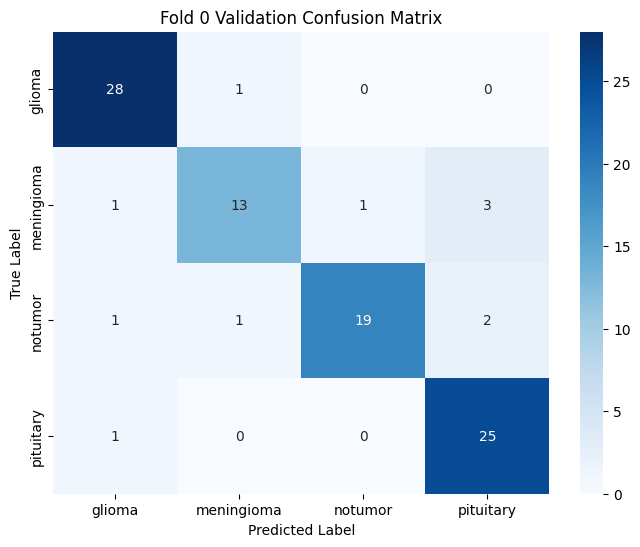

Classification Report for Fold 0:
              precision    recall  f1-score   support

      glioma       0.90      0.97      0.93        29
  meningioma       0.87      0.72      0.79        18
     notumor       0.95      0.83      0.88        23
   pituitary       0.83      0.96      0.89        26

    accuracy                           0.89        96
   macro avg       0.89      0.87      0.87        96
weighted avg       0.89      0.89      0.88        96

Class-wise TP, TN, FP, FN for Fold 0:
Class: glioma, TP: 28, TN: 64, FP: 3, FN: 1
Class: meningioma, TP: 13, TN: 76, FP: 2, FN: 5
Class: notumor, TP: 19, TN: 72, FP: 1, FN: 4
Class: pituitary, TP: 25, TN: 65, FP: 5, FN: 1
Loading model for fold 1...
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 89ms/step
Fold 1 - ROC-AUC for class glioma: 0.9571
Fold 1 - ROC-AUC for class meningioma: 0.8625
Fold 1 - ROC-AUC for class notumor: 0.9737
Fold 1 - ROC-AUC for class pituitary: 0.9440


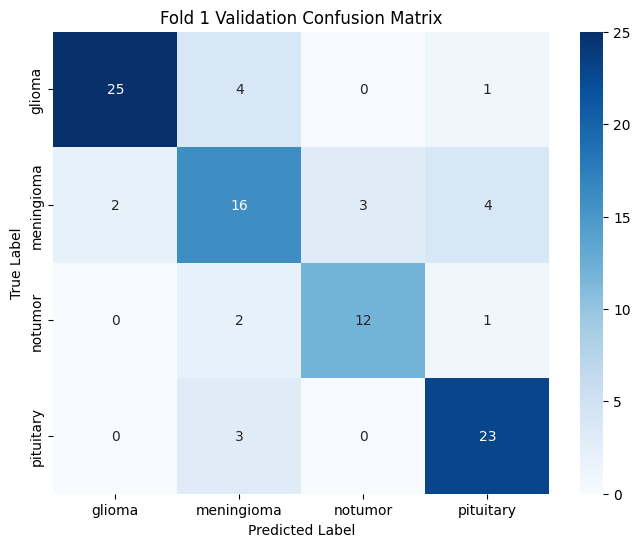

Classification Report for Fold 1:
              precision    recall  f1-score   support

      glioma       0.93      0.83      0.88        30
  meningioma       0.64      0.64      0.64        25
     notumor       0.80      0.80      0.80        15
   pituitary       0.79      0.88      0.84        26

    accuracy                           0.79        96
   macro avg       0.79      0.79      0.79        96
weighted avg       0.80      0.79      0.79        96

Class-wise TP, TN, FP, FN for Fold 1:
Class: glioma, TP: 25, TN: 64, FP: 2, FN: 5
Class: meningioma, TP: 16, TN: 62, FP: 9, FN: 9
Class: notumor, TP: 12, TN: 78, FP: 3, FN: 3
Class: pituitary, TP: 23, TN: 64, FP: 6, FN: 3
Loading model for fold 2...
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 87ms/step
Fold 2 - ROC-AUC for class glioma: 0.9883
Fold 2 - ROC-AUC for class meningioma: 0.9308
Fold 2 - ROC-AUC for class notumor: 0.9848
Fold 2 - ROC-AUC for class pituitary: 0.9745


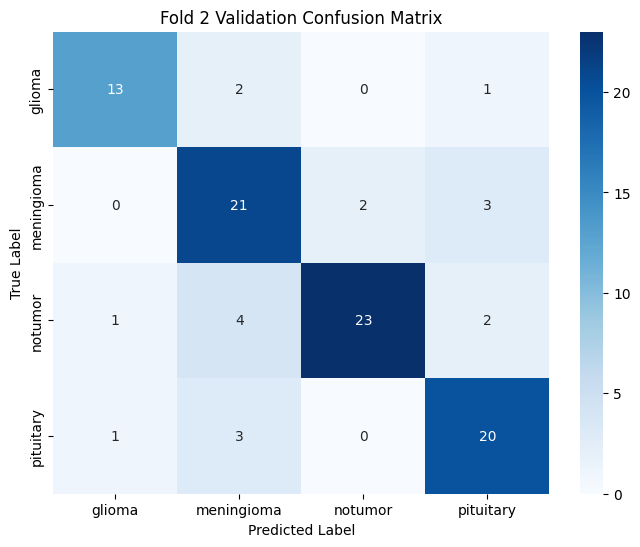

Classification Report for Fold 2:
              precision    recall  f1-score   support

      glioma       0.87      0.81      0.84        16
  meningioma       0.70      0.81      0.75        26
     notumor       0.92      0.77      0.84        30
   pituitary       0.77      0.83      0.80        24

    accuracy                           0.80        96
   macro avg       0.81      0.81      0.81        96
weighted avg       0.81      0.80      0.80        96

Class-wise TP, TN, FP, FN for Fold 2:
Class: glioma, TP: 13, TN: 78, FP: 2, FN: 3
Class: meningioma, TP: 21, TN: 61, FP: 9, FN: 5
Class: notumor, TP: 23, TN: 64, FP: 2, FN: 7
Class: pituitary, TP: 20, TN: 66, FP: 6, FN: 4
Loading model for fold 3...
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 86ms/step
Fold 3 - ROC-AUC for class glioma: 0.9714
Fold 3 - ROC-AUC for class meningioma: 0.9275
Fold 3 - ROC-AUC for class notumor: 0.9681
Fold 3 - ROC-AUC for class pituitary: 0.9929


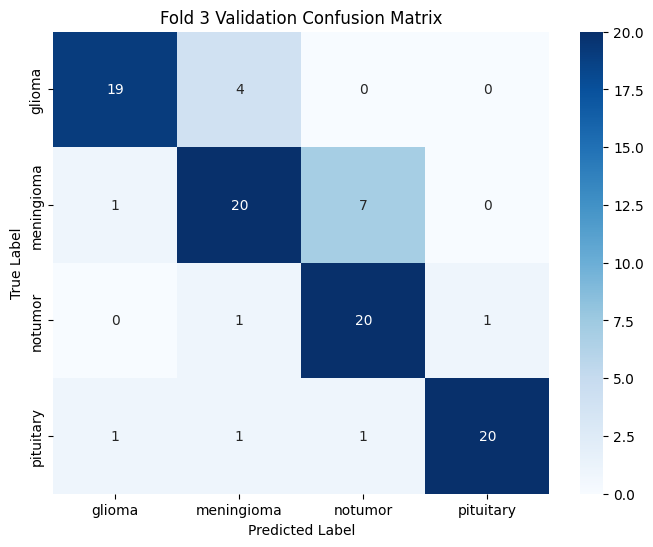

Classification Report for Fold 3:
              precision    recall  f1-score   support

      glioma       0.90      0.83      0.86        23
  meningioma       0.77      0.71      0.74        28
     notumor       0.71      0.91      0.80        22
   pituitary       0.95      0.87      0.91        23

    accuracy                           0.82        96
   macro avg       0.84      0.83      0.83        96
weighted avg       0.83      0.82      0.82        96

Class-wise TP, TN, FP, FN for Fold 3:
Class: glioma, TP: 19, TN: 71, FP: 2, FN: 4
Class: meningioma, TP: 20, TN: 62, FP: 6, FN: 8
Class: notumor, TP: 20, TN: 66, FP: 8, FN: 2
Class: pituitary, TP: 20, TN: 72, FP: 1, FN: 3
Loading model for fold 4...
Found 96 images belonging to 4 classes.
6/6 [==============================] - 1s 85ms/step
Fold 4 - ROC-AUC for class glioma: 0.9748
Fold 4 - ROC-AUC for class meningioma: 0.9095
Fold 4 - ROC-AUC for class notumor: 0.9692
Fold 4 - ROC-AUC for class pituitary: 0.9975


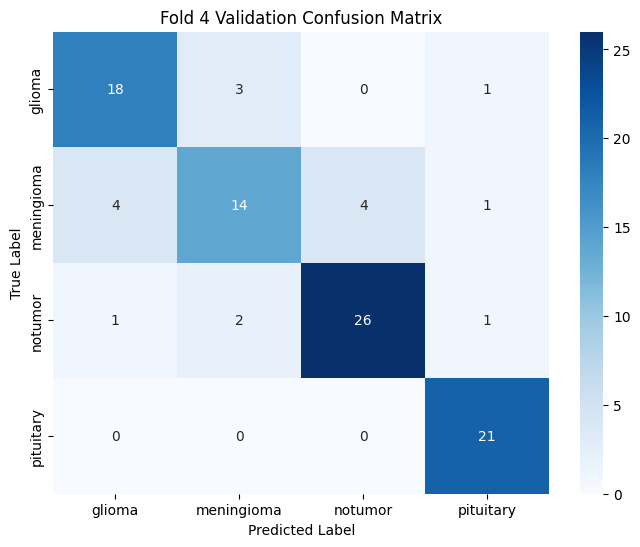

Classification Report for Fold 4:
              precision    recall  f1-score   support

      glioma       0.78      0.82      0.80        22
  meningioma       0.74      0.61      0.67        23
     notumor       0.87      0.87      0.87        30
   pituitary       0.88      1.00      0.93        21

    accuracy                           0.82        96
   macro avg       0.82      0.82      0.82        96
weighted avg       0.82      0.82      0.82        96

Class-wise TP, TN, FP, FN for Fold 4:
Class: glioma, TP: 18, TN: 69, FP: 5, FN: 4
Class: meningioma, TP: 14, TN: 68, FP: 5, FN: 9
Class: notumor, TP: 26, TN: 62, FP: 4, FN: 4
Class: pituitary, TP: 21, TN: 72, FP: 3, FN: 0


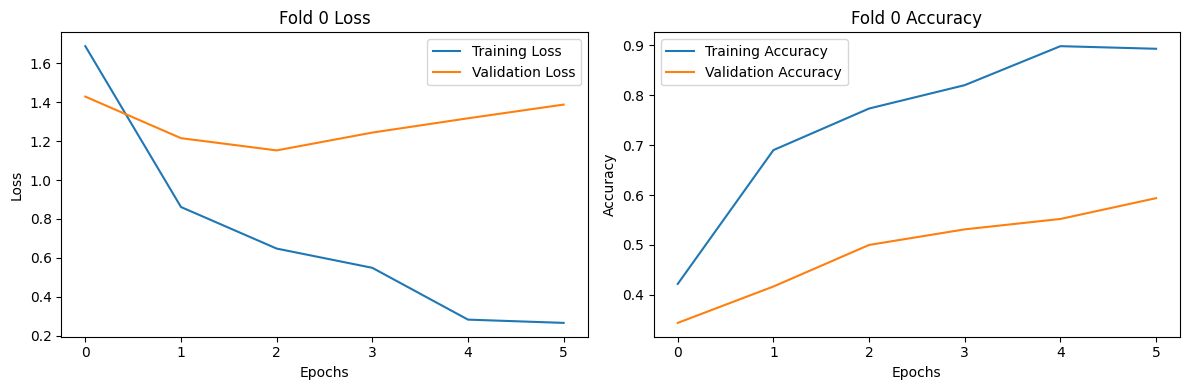

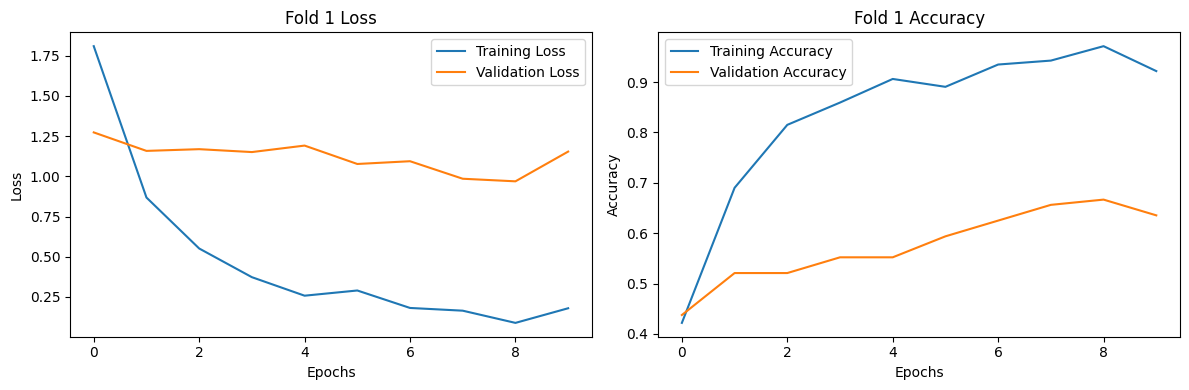

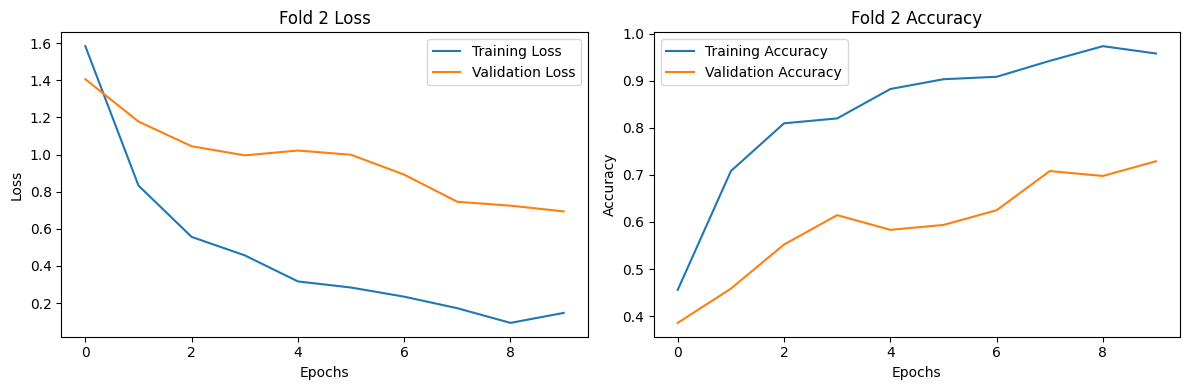

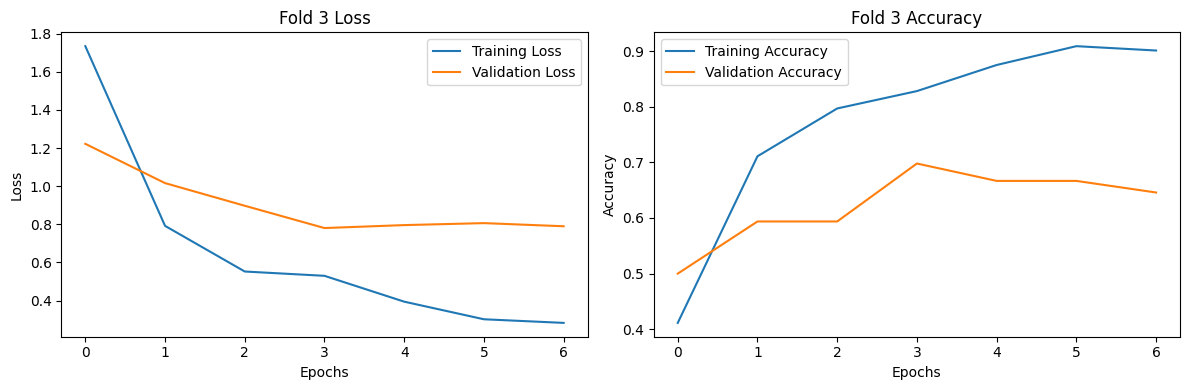

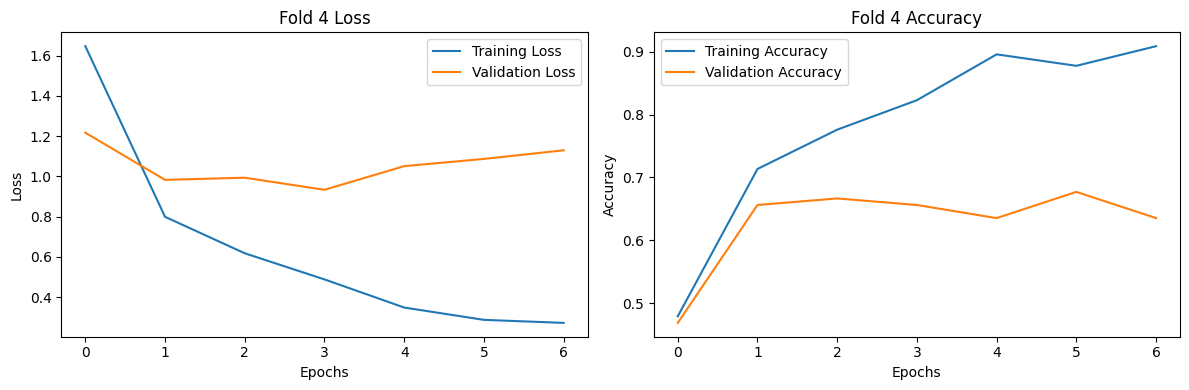

Accuracies for each fold:
Fold 0: 50.00%
Fold 1: 63.54%
Fold 2: 72.92%
Fold 3: 69.79%
Fold 4: 65.62%


In [493]:
base_dir = 'dataset_kfold'

all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []
fold_accuracies = []

for fold in range(5):
    print(f'Starting training for fold {fold}...')

    fold_dir = os.path.join(base_dir, f'fold_{fold}')
    train_dir = os.path.join(fold_dir, 'train')
    val_dir = os.path.join(fold_dir, 'val')

    # Load the datasets
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical'
    )
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical'
    )

    # Get the model and compile it
    num_classes = len(train_generator.class_indices)
    model = get_mobilenetv2_model(num_classes)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train and evaluate the model
    model, history = train_model(model, train_generator, val_generator, num_epochs=10, patience=3)

    # Save the model for this fold
    #model_path = f'mobilenetv2_fold_{fold}.h5'
    #model.save(model_path)
    #print(f'Model for fold {fold} saved at {model_path}')

    # Collecting results for plotting
    all_train_losses.append(history.history['loss'])
    all_val_losses.append(history.history['val_loss'])
    all_train_accuracies.append(history.history['accuracy'])
    all_val_accuracies.append(history.history['val_accuracy'])

    print(f'Evaluating model for fold {fold}...')
    val_loss, val_acc = evaluate_model(model, val_generator)
    fold_accuracies.append(val_acc)
    print(f'Val loss: {val_loss:.4f}, Val accuracy: {val_acc * 100:.4f}')
    print(f'Training and evaluation for fold {fold} completed.\n')

# Detailed Evaluation for Each Fold
for fold in range(5):
    print(f'Loading model for fold {fold}...')
    model_path = f'mobilenetv2_fold_{fold}.h5'
    model = tf.keras.models.load_model(model_path)

    val_dir = os.path.join(base_dir, f'fold_{fold}', 'val')
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical',
        shuffle=False
    )

    val_predictions = model.predict(val_generator)
    val_predictions_classes = np.argmax(val_predictions, axis=1)
    val_true_classes = val_generator.classes

    val_conf_matrix = confusion_matrix(val_true_classes, val_predictions_classes)

    val_true_classes_one_hot = tf.keras.utils.to_categorical(val_true_classes, num_classes)
    auc_roc_scores = {}
    for i, class_name in enumerate(val_generator.class_indices.keys()):
        fpr, tpr, _ = roc_curve(val_true_classes_one_hot[:, i], val_predictions[:, i])
        roc_auc = auc(fpr, tpr)
        auc_roc_scores[class_name] = roc_auc
        print(f'Fold {fold} - ROC-AUC for class {class_name}: {roc_auc:.4f}')

    plt.figure(figsize=(8, 6))
    sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Fold {fold} Validation Confusion Matrix')
    plt.show()

    print(f'Classification Report for Fold {fold}:')
    print(classification_report(val_true_classes, val_predictions_classes, target_names=list(val_generator.class_indices.keys())))

    class_names = list(val_generator.class_indices.keys())
    table_data = []
    for i, class_name in enumerate(class_names):
        tp = val_conf_matrix[i, i]
        fp = np.sum(val_conf_matrix[:, i]) - tp
        fn = np.sum(val_conf_matrix[i, :]) - tp
        tn = np.sum(val_conf_matrix) - tp - fp - fn
        table_data.append([class_name, tp, tn, fp, fn])

    print(f"Class-wise TP, TN, FP, FN for Fold {fold}:")
    for row in table_data:
        print(f"Class: {row[0]}, TP: {row[1]}, TN: {row[2]}, FP: {row[3]}, FN: {row[4]}")

# Plotting Results
def plot_results(all_train_losses, all_val_losses, all_train_accuracies, all_val_accuracies):
    for fold in range(5):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(all_train_losses[fold], label='Training Loss')
        plt.plot(all_val_losses[fold], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Fold {fold} Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(all_train_accuracies[fold], label='Training Accuracy')
        plt.plot(all_val_accuracies[fold], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Fold {fold} Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

plot_results(all_train_losses, all_val_losses, all_train_accuracies, all_val_accuracies)

print("Accuracies for each fold:")
for fold, accuracy in enumerate(fold_accuracies):
    print(f"Fold {fold}: {accuracy * 100:.2f}%")